In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pandas import read_csv

### Chargement du train set

In [4]:
df = pd.read_csv('training_solutions_rev1.csv')

In [5]:
df

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

### Récupération des 3 premièers classes

In [30]:
df2 = df.iloc[:,:4]

In [31]:
df2

GalaxyID  Class1.1  Class1.2  Class1.3
0        100008  0.383147  0.616853  0.000000
1        100023  0.327001  0.663777  0.009222
2        100053  0.765717  0.177352  0.056931
3        100078  0.693377  0.238564  0.068059
4        100090  0.933839  0.000000  0.066161
...         ...       ...       ...       ...
61573    999948  0.510379  0.489621  0.000000
61574    999950  0.901216  0.098784  0.000000
61575    999958  0.202841  0.777376  0.019783
61576    999964  0.091000  0.909000  0.000000
61577    999967  0.767000  0.140000  0.093000

[61578 rows x 4 columns]

### Identification de la classe à probabilité majoritaire

In [36]:
df2['Class'] = df2.iloc[:,1:4].idxmax(axis = 1)
df2

GalaxyID  Class1.1  Class1.2  Class1.3     Class
0        100008  0.383147  0.616853  0.000000  Class1.2
1        100023  0.327001  0.663777  0.009222  Class1.2
2        100053  0.765717  0.177352  0.056931  Class1.1
3        100078  0.693377  0.238564  0.068059  Class1.1
4        100090  0.933839  0.000000  0.066161  Class1.1
...         ...       ...       ...       ...       ...
61573    999948  0.510379  0.489621  0.000000  Class1.1
61574    999950  0.901216  0.098784  0.000000  Class1.1
61575    999958  0.202841  0.777376  0.019783  Class1.2
61576    999964  0.091000  0.909000  0.000000  Class1.2
61577    999967  0.767000  0.140000  0.093000  Class1.1

[61578 rows x 5 columns]

### Tri par proba de class décroissante pour chaque classe

In [82]:
class1 = df2.loc[(df2['Class'] == 'Class1.1')].sort_values('Class1.1', ascending=False)
class1

GalaxyID  Class1.1  Class1.2  Class1.3     Class
58228    950850  1.000000  0.000000  0.000000  Class1.1
19719    389459  1.000000  0.000000  0.000000  Class1.1
15041    322803  1.000000  0.000000  0.000000  Class1.1
14929    321044  1.000000  0.000000  0.000000  Class1.1
30195    542697  1.000000  0.000000  0.000000  Class1.1
...         ...       ...       ...       ...       ...
61       100938  0.384686  0.238401  0.376913  Class1.1
22483    428697  0.383617  0.287934  0.328449  Class1.1
42479    719893  0.374628  0.260064  0.365309  Class1.1
60181    979489  0.373769  0.316534  0.309697  Class1.1
5780     185816  0.360809  0.358149  0.281041  Class1.1

[26693 rows x 5 columns]

In [83]:
class2 = df2.loc[(df2['Class'] == 'Class1.2')].sort_values('Class1.2', ascending=False)
class2

GalaxyID  Class1.1  Class1.2  Class1.3     Class
8787     229602  0.000000  1.000000  0.000000  Class1.2
37152    642684  0.000000  1.000000  0.000000  Class1.2
8743     228944  0.000000  1.000000  0.000000  Class1.2
24919    463959  0.000000  1.000000  0.000000  Class1.2
37330    645519  0.000000  1.000000  0.000000  Class1.2
...         ...       ...       ...       ...       ...
33163    586256  0.336000  0.396000  0.268000  Class1.2
16044    337325  0.383657  0.388412  0.227931  Class1.2
10916    262021  0.293000  0.357000  0.350000  Class1.2
39725    678893  0.291513  0.354642  0.353845  Class1.2
39751    679362  0.331929  0.350377  0.317694  Class1.2

[34826 rows x 5 columns]

In [84]:
class3 = df2.loc[(df2['Class'] == 'Class1.3')].sort_values('Class1.3', ascending=False)
class3

GalaxyID  Class1.1  Class1.2  Class1.3     Class
17392    356310  0.064853  0.000000  0.935147  Class1.3
16618    345209  0.123542  0.000000  0.876458  Class1.3
58526    955102  0.172172  0.034034  0.793794  Class1.3
1791     126783  0.178000  0.044000  0.778000  Class1.3
61345    996629  0.290021  0.000000  0.709979  Class1.3
28337    515600  0.227000  0.068000  0.705000  Class1.3
46887    783039  0.279000  0.023000  0.698000  Class1.3
36732    636777  0.274000  0.042000  0.684000  Class1.3
23081    437063  0.319300  0.000000  0.680700  Class1.3
58550    955433  0.260000  0.060000  0.680000  Class1.3
28355    515861  0.049617  0.272567  0.677816  Class1.3
17449    357133  0.311000  0.022000  0.667000  Class1.3
61020    991223  0.255194  0.082220  0.662587  Class1.3
48766    809904  0.302000  0.038000  0.660000  Class1.3
37433    646820  0.205000  0.136000  0.659000  Class1.3
38478    661494  0.194194  0.170170  0.635636  Class1.3
46559    778819  0.266733  0.106893  0.626374  Class1.3
59446    968274  0.229000  0.146000  0.625000  Class1.3
39135    670988  0.095000  0.287000  0.618000  Class1.3
33025    584391  0.176000  0.206000  0.618000  Class1.3
23883    448708  0.385890  0.000000  0.614110  Class1.3
10555    256893  0.250000  0.139000  0.611000  Class1.3
28385    516309  0.283000  0.113000  0.604000  Class1.3
47472    791604  0.221000  0.176000  0.603000  Class1.3
7557     211113  0.289000  0.133000  0.578000  Class1.3
61471    998352  0.357880  0.069154  0.572966  Class1.3
42594    721707  0.159378  0.273011  0.567610  Class1.3
55989    917782  0.387387  0.045045  0.567568  Class1.3
52525    865297  0.256000  0.186000  0.558000  Class1.3
48754    809801  0.368000  0.079000  0.553000  Class1.3
10527    256411  0.404595  0.047952  0.547453  Class1.3
36951    640115  0.327000  0.127000  0.546000  Class1.3
2376     135453  0.360342  0.098619  0.541039  Class1.3
8672     227890  0.465000  0.000000  0.535000  Class1.3
14913    320852  0.145232  0.321232  0.533536  Class1.3
57288    936633  0.422422  0.044044  0.533534  Class1.3
46278    774675  0.382382  0.088088  0.529530  Class1.3
33322    588555  0.113000  0.361000  0.526000  Class1.3
7434     209411  0.273749  0.202910  0.523342  Class1.3
27057    496080  0.182000  0.295000  0.523000  Class1.3
26252    483706  0.327031  0.155775  0.517194  Class1.3
52084    858943  0.269049  0.214574  0.516376  Class1.3
51333    847440  0.444444  0.044044  0.511512  Class1.3
18809    376334  0.473000  0.022000  0.505000  Class1.3
12468    284451  0.287022  0.221976  0.491003  Class1.3
40463    689434  0.400000  0.111000  0.489000  Class1.3
6957     202788  0.242413  0.290022  0.467565  Class1.3
42740    723850  0.370682  0.175171  0.454147  Class1.3
29231    528143  0.402756  0.149311  0.447933  Class1.3
18646    373941  0.361000  0.203000  0.436000  Class1.3
8410     223904  0.190554  0.373539  0.435907  Class1.3
58240    951012  0.326681  0.247330  0.425988  Class1.3
33151    586075  0.329214  0.245599  0.425188  Class1.3
39432    674832  0.411411  0.166166  0.422422  Class1.3
21011    406866  0.289000  0.294000  0.417000  Class1.3
42710    723396  0.353298  0.254995  0.391707  Class1.3
13073    293836  0.295000  0.341000  0.364000  Class1.3
54898    901883  0.327000  0.314000  0.359000  Class1.3
45129    758548  0.335463  0.305678  0.358859  Class1.3

### Récupération des Id des 100 premières images de chaque classe

In [85]:
sample_class_1 = class1.head(100).iloc[:,:1]
sample_class_2 = class2.head(100).iloc[:,:1]
sample_class_3 = class3.head(100).iloc[:,:1]

### Création d'un dossier par classe s'il n'existe pas déjà

In [86]:
import os
if not os.path.exists('sample_class_1'):
    os.makedirs('sample_class_1')
if not os.path.exists('sample_class_2'):
    os.makedirs('sample_class_2')    
if not os.path.exists('sample_class_3'):
    os.makedirs('sample_class_3')   

### Copie des images de chaque class dans le dossier correspondant

In [87]:
import shutil
for row in sample_class_1['GalaxyID']:
    path_img = f"images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, 'sample_class_1')
    
for row in sample_class_2['GalaxyID']:
    path_img = f"images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, 'sample_class_2')
    
for row in sample_class_3['GalaxyID']:
    path_img = f"images_training_rev1/{row}.jpg"
    filePath = shutil.copy(path_img, 'sample_class_3')

### Affichage des images de chaque catégorie, pour aperçu

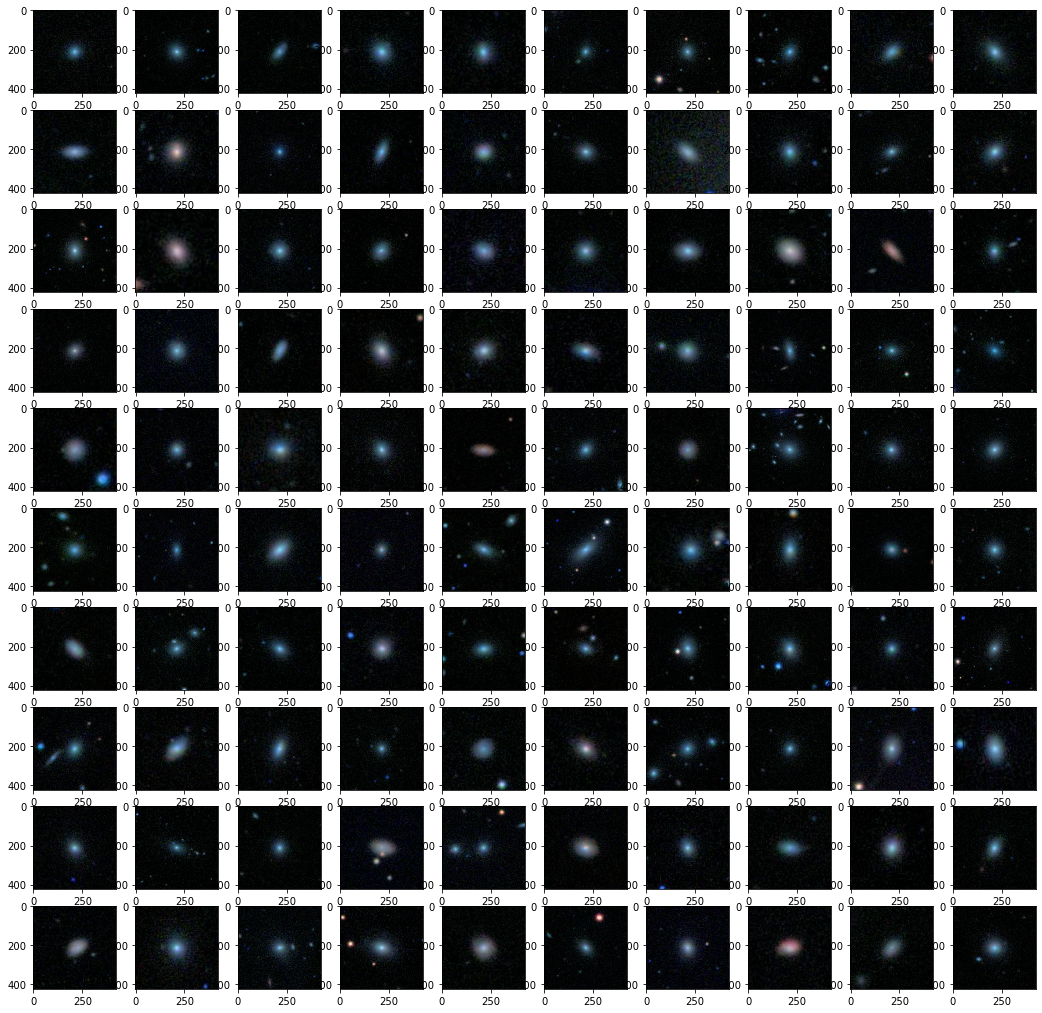

In [88]:
fig, axs = plt.subplots(10, 10, figsize=(18, 18))
i = 0
for x in range(10):
    for y in range(10):
        img = cv2.imread(f'./sample_class_1/{sample_class_1.iloc[i,0]}.jpg')
        axs[x,y].imshow(img)
        i += 1

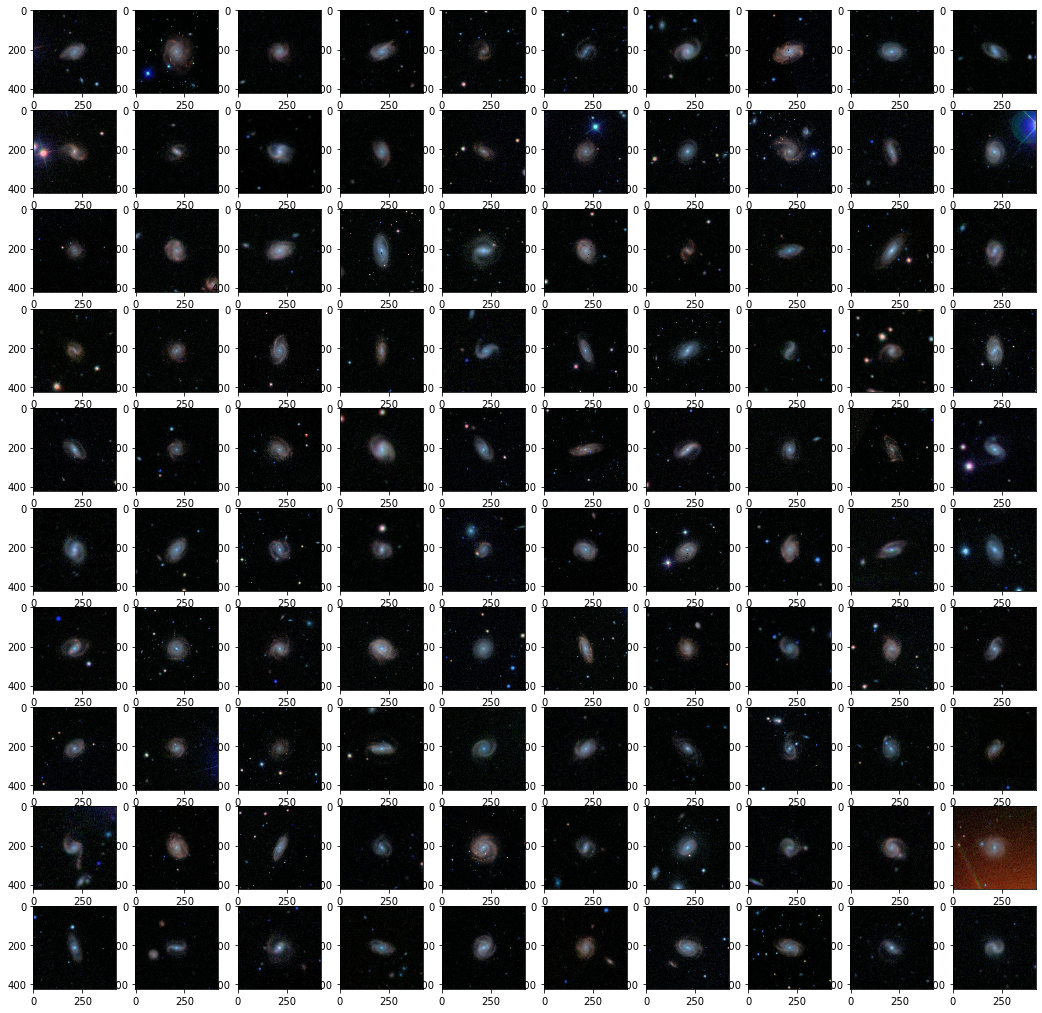

In [89]:
fig, axs = plt.subplots(10, 10, figsize=(18, 18))
i = 0
for x in range(10):
    for y in range(10):
        img = cv2.imread(f'./sample_class_2/{sample_class_2.iloc[i,0]}.jpg')
        axs[x,y].imshow(img)
        i += 1

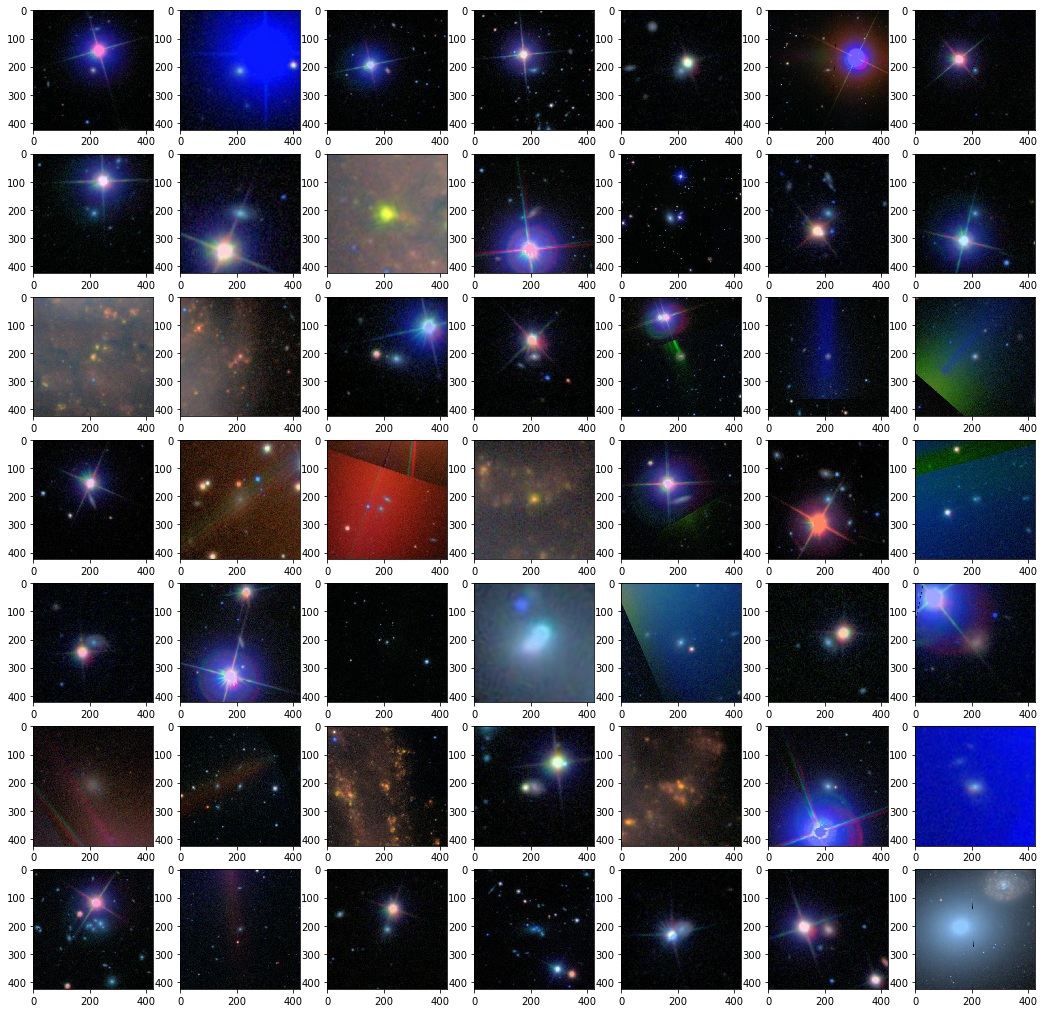

In [92]:
fig, axs = plt.subplots(7, 7, figsize=(18, 18))
i = 0
for x in range(7):
    for y in range(7):
        img = cv2.imread(f'./sample_class_3/{sample_class_3.iloc[i,0]}.jpg')
        axs[x,y].imshow(img)
        i += 1

### Heuristique : Chercher une fonction qui cherche les croix pour détecter les étoiles, avec opencv

### Class 1:
- Boule diffuse

### Class 2:
- Forme spirale, ronde, et plate
- Fond noir en périphérie image -> chercher comment détourer l'image autour de la galaxie -> taille minimale de l'image

### Class 3 : 
- Présence d'une croix lumineuse -> chercher algo opencv détection croix.
-

### Image pre-processing

In [92]:
image = cv2.imread('sample_class_3/126783.jpg')

Réduction du bruit : flou gaussien

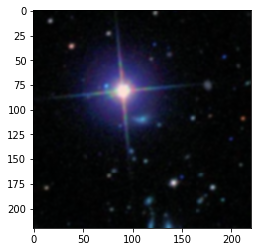

In [93]:
# Remove noise

height = 220
width = 220
dim = (width, height)

# setting dim of the resize
res = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# Gaussian
blur = cv2.GaussianBlur(res, (5, 5), 0)

plt.imshow(blur)

Segmentation

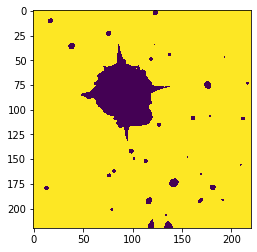

In [94]:
# Segmentation
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.imshow(thresh)




Sélection de la meilleure forme de la segmentation

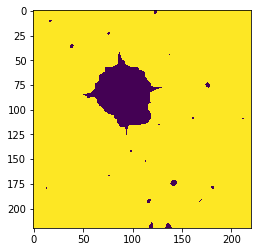

In [95]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=1)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(sure_bg)

Séparation des objets de l'image segmentée

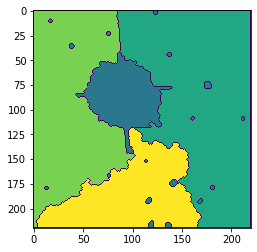

In [96]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(blur, markers)
blur[markers == -1] = [255, 0, 0]

plt.imshow(markers)

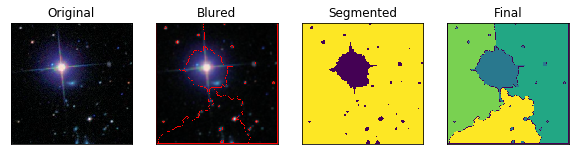

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(141), plt.imshow(image), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(blur), plt.title('Blured')
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(thresh), plt.title('Segmented')
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(markers), plt.title('Final')
plt.xticks([]), plt.yticks([])

plt.show()

## Réduction dimensionalité

### Watershed pour effacer les étoiles parasite, via utilisation masque

(<matplotlib.axes._subplots.AxesSubplot at 0x24fe1a77bc8>,
 Text(0.5, 1.0, 'Sans les parasite'))

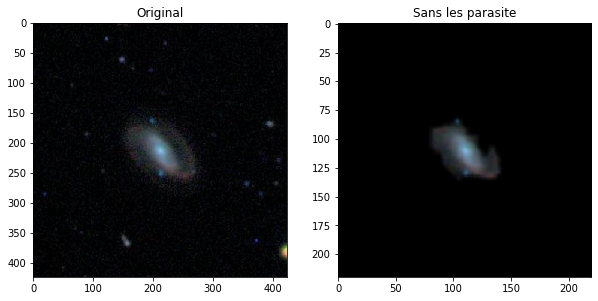

In [128]:
image = cv2.imread('sample_class_2/120632.jpg')

# Remove noise
#height = 220
#width = 220
#dim = (width, height)

# Setting dim of the resize
#res = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)

# Blur : Gaussian
blur = cv2.GaussianBlur(res, (5, 5), 0)

# Segmentation
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Marker labelling
ret, markers = cv2.connectedComponents(thresh)

# Add one to all labels so that sure background is not 0, but 1
#markers = markers + 1

# Now, mark the region of unknown with zero
#markers[unknown == 255] = 0

markers = cv2.watershed(blur, markers)
#blur[markers == -1] = [255, 0, 0]

center = markers[106, 106]

masque = np.array(markers)
blur2 = blur.copy()
masque[:,:] = 0
masque[markers == center] = 255

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
#masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)
masque = cv2.blur(masque.astype(float), (5,5))

#Application du masque sur le blur
for i in range(3):
    blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)

    
plt.figure(figsize=(10,10))

plt.subplot(121), plt.imshow(image), plt.title('Original')
plt.subplot(122), plt.imshow(blur2), plt.title('Sans les parasite')


### Rognage fixe puis application nettoyage image

Rognage fixe

In [3]:
image = cv2.imread('sample_class_2/974313.jpg')
h = 300
w = 300
crop = image[-h:h, -w:w]

Nettoyage de l'image

(<matplotlib.axes._subplots.AxesSubplot at 0x1a78918f488>,
 Text(0.5, 1.0, 'Sans les parasite'))

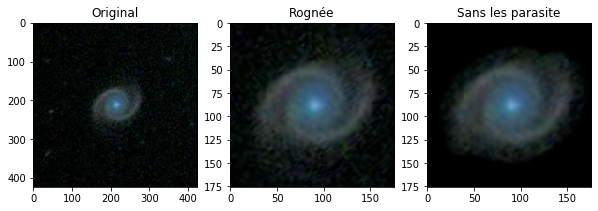

In [4]:
blur = cv2.GaussianBlur(crop, (5, 5), 0)

# Segmentation
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Marker labelling
ret, markers = cv2.connectedComponents(thresh)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1


markers = cv2.watershed(blur, markers)
#blur[markers == -1] = [255, 0, 0]

center = markers[round(crop.shape[0]/2), round(crop.shape[1]/2)]

masque = np.array(markers)
blur2 = blur.copy()
masque[:,:] = 0
masque[markers == center] = 255

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)
masque = cv2.blur(masque.astype(float), (5,5))

#Application du masque sur le blur
for i in range(3):
    blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)

    
plt.figure(figsize=(10,10))

plt.subplot(131), plt.imshow(image), plt.title('Original')
plt.subplot(132), plt.imshow(crop), plt.title('Rognée')
plt.subplot(133), plt.imshow(blur2), plt.title('Sans les parasite')


### Détection automatique des objets

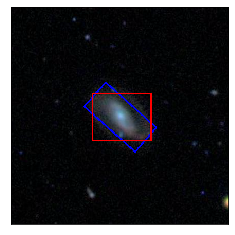

In [83]:
img = cv2.imread('sample_class_2/120632.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

max_numb = 0
for contour in contours:
    if len(contour) > max_numb:
        max_numb = len(contour)
        cnt = contour
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(img)
plt.xticks([])
plt.yticks([]);

In [84]:
print(x)
print(y)
print(w)
print(h)

158
170
114
91


In [6]:
img.shape

(424, 424, 3)

### Rognage de l'image autour de l'objet détecté

(181, 190, 3)


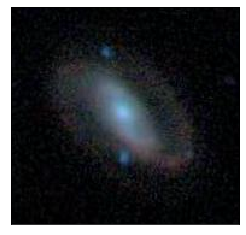

In [87]:
img = cv2.imread('sample_class_2/120632.jpg')

img_crop = img[y-int(h/2):y+int(3*h/2), x-int(w/3):x+int(4*w/3)]

plt.imshow(img_crop);
plt.xticks([])
plt.yticks([])
print(img_crop.shape)

### Nettoyage de l'image rognée

(<matplotlib.axes._subplots.AxesSubplot at 0x1a790771d88>,
 Text(0.5, 1.0, 'Sans les parasite'))

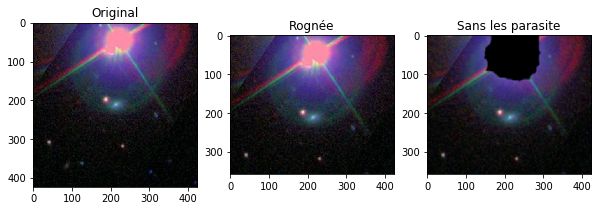

In [82]:
blur = cv2.GaussianBlur(img_crop, (5, 5), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

# Marker labelling
ret, markers = cv2.connectedComponents(thresh)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1


markers = cv2.watershed(blur, markers)
#blur[markers == -1] = [255, 0, 0]

center = markers[round(img_crop.shape[0]/2), round(img_crop.shape[1]/2)]

masque = np.array(markers)
blur2 = blur.copy()
masque[:,:] = 0
masque[markers == center] = 255

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)
masque = cv2.blur(masque.astype(float), (5,5))

#Application du masque sur le blur
for i in range(3):
    blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)

    
plt.figure(figsize=(10,10))

plt.subplot(131), plt.imshow(img), plt.title('Original')
plt.subplot(132), plt.imshow(img_crop), plt.title('Rognée')
plt.subplot(133), plt.imshow(blur2), plt.title('Sans les parasite')

### Mise à taille fixe de l'image netoyée

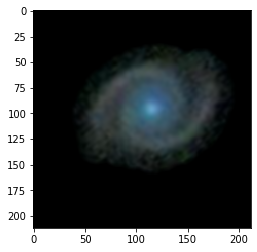

In [21]:
from PIL import Image

pil_im = Image.fromarray(blur2)

min_size = 212
x = blur2.shape[0]
y = blur2.shape[1]
size = max(min_size, x, y)
fill_color = (0,0,0,255)
new_im = Image.new('RGBA', (size, size), fill_color)
new_im.paste(pil_im, (int((size - x) / 2), int((size - y) / 2)))

#new_image = make_square(blur2)
plt.imshow(new_im)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a78a99cd88>,
 Text(0.5, 1.0, 'Resized'))

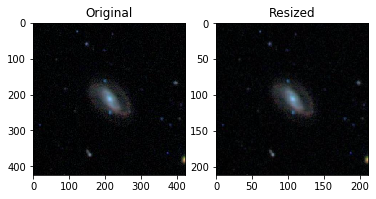

In [25]:
image = cv2.imread('sample_class_2/120632.jpg')

height = 212
width = 212
dim = (width, height)

res = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

plt.subplot(121), plt.imshow(image), plt.title('Original')
plt.subplot(122), plt.imshow(res), plt.title('Resized')

### Rognage et redimensionnement en une seule fois

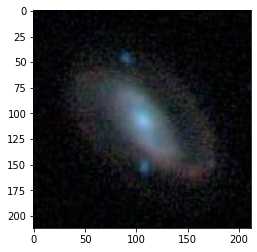

In [27]:
image = cv2.imread('sample_class_2/120632.jpg')

h = 300
w = 300

height = 212
width = 212
dim = (width, height)

#crop = image[-h:h, -w:w]
res = cv2.resize(image[-h:h, -w:w], dim, interpolation=cv2.INTER_AREA)

plt.imshow(res)

### Détection objet, rognage, redimensionnement et nettoyage

(<matplotlib.axes._subplots.AxesSubplot at 0x1a794e250c8>,
 Text(0.5, 1.0, 'Cleaned'))

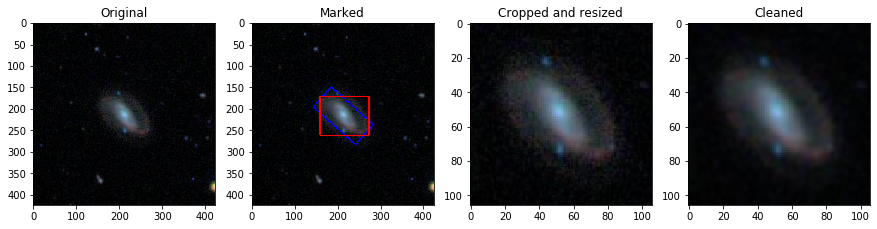

In [144]:
path = 'sample_class_2/120632.jpg'

image = cv2.imread(path)

# Détection d'objet
img_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
contours, hierarchy = cv2.findContours(thresh, 1, 2)

max_numb = 0
for contour in contours:
    if len(contour) > max_numb:
        max_numb = len(contour)
        cnt = contour
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
#print(box)
cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Rognage et redimensionnement autour de l'objet détecté

height = 106
width = 106
dim = (width, height)

img = cv2.imread(path)
img_crop = img[y-int(h/2):y+int(3*h/2), x-int(w/3):x+int(4*w/3)]

resized = cv2.resize(img[y-int(h/2):y+int(3*h/2), x-int(w/3):x+int(4*w/3)], dim, interpolation=cv2.INTER_AREA)

# Nettoyage de l'image redimensionnée

blur = cv2.GaussianBlur(resized, (5, 5), 0)
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

ret, markers = cv2.connectedComponents(thresh)

markers = markers + 1

markers = cv2.watershed(blur, markers)

center = markers[round(img_crop.shape[0]/2), round(img_crop.shape[1]/2)]

masque = np.array(markers)
blur2 = blur.copy()
masque[:,:] = 0
masque[markers == center] = 255

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)
masque = cv2.blur(masque.astype(float), (5,5))

for i in range(3):
    blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)

# Affichage des différentes étapes

plt.figure(figsize=(15,15))

plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(image), plt.title('Marked')
plt.subplot(143), plt.imshow(resized), plt.title('Cropped and resized')
plt.subplot(144), plt.imshow(blur2), plt.title('Cleaned')

Vérification centre du rectangle de l'objet est au centre de l'image

In [115]:
print(box)

XcenterImage = int(image.shape[0] /2)
YcenterImage = int(image.shape[1] / 2)

XcenterBox = int((box[0][0]+box[2][0])/2)
YcenterBox = int((box[0][1]+box[2][1])/2)

print(XcenterImage, YcenterImage)
print(XcenterBox, YcenterBox)

# teste si le centre de box est dans une zone de 5% autour du centre de l'image
if ((XcenterBox <= 1.05 * XcenterImage) or (XcenterBox >= 0.95 * XcenterImage)) and ((YcenterBox <= 1.05 * YcenterImage) or (YcenterBox >= 0.95 * YcenterImage)):
    print(XcenterBox)

[[241 283]
 [142 195]
 [184 148]
 [282 236]]
212 212
212 215
212


In [138]:
def crop_resize_clean(path_picture):

    image = cv2.imread(path_picture)

    # Détection d'objet
    img_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    ret, thresh = cv2.threshold(img_grey, thresh=40, maxval=255, type=0)
    contours, hierarchy = cv2.findContours(thresh, 1, 2)

    max_numb = 0
    for contour in contours:
        if len(contour) > max_numb:
            max_numb = len(contour)
            cnt = contour
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    cv2.drawContours(image, [box], 0, (0, 0, 255), 2)

    #x,y,w,h = cv2.boundingRect(cnt)
    #cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Rognage et redimensionnement autour de l'objet détecté

    height = 106
    width = 106
    dim = (width, height)

    img = cv2.imread(path)
    img_crop = img[y-int(h/2):y+int(3*h/2), x-int(w/3):x+int(4*w/3)]

    resized = cv2.resize(img[y-int(h/2):y+int(3*h/2), x-int(w/3):x+int(4*w/3)], dim, interpolation=cv2.INTER_AREA)

    # Nettoyage de l'image redimensionnée

    blur = cv2.GaussianBlur(resized, (5, 5), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

    ret, markers = cv2.connectedComponents(thresh)

    markers = markers + 1

    markers = cv2.watershed(blur, markers)

    center = markers[round(img_crop.shape[0]/2), round(img_crop.shape[1]/2)]

    masque = np.array(markers)
    blur2 = blur.copy()
    masque[:,:] = 0
    masque[markers == center] = 255

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
    masque = cv2.dilate(masque.astype(np.uint8), kernel, iterations = 1)
    masque = cv2.blur(masque.astype(float), (5,5))

    for i in range(3):
        blur2[:,:,i] = (masque*blur[:,:,i]/255.0).astype(np.uint8)

    return blur2

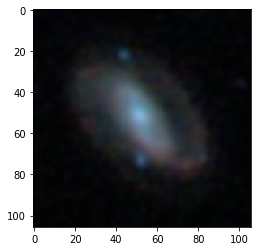

In [143]:
final = crop_resize_clean('sample_class_2/120632.jpg')

plt.imshow(crop_resize_clean('sample_class_2/121394.jpg'))